# Simulating Gravitational Differences: The Free Fall of a 20-Peso Coin as a Common Object Across Solar System Planets
---
<div style="text-align: justify;">

## Abstract
### This study simulates the free fall of a common object such as 20-peso coin on nine planets to explore how varying gravitational forces impact fall time and velocity. Using equations of motion, it demonstrates that planets with stronger gravity (e.g., Jupiter) yield shorter fall times and higher velocities, while weaker gravity (e.g., Pluto) produces the opposite effect. Results are visualized using graphs, confirming trends and providing insights into planetary motion dynamics.
---
<div style="text-align: justify;">

### Introduction
### Free fall describes motion under gravity alone, with acceleration dependent on the planet’s gravity. While Earth's gravity (9.81 m/s²) serves as a reference, other planets have varying gravitational forces. This variability influences fall times and velocities of objects, making it essential to study free-fall dynamics for both educational and scientific purposes.  
 
---
### Problem Statement
## **How does gravitational acceleration influence the fall time and velocity of a common object like a coin on different planets in our solar system?**
---
### Objectives
### 1. Simulate the free fall of a 20-peso coin on different planets.  
### 2. Compute fall times and velocities using motion equations.  
### 3. Visualize and analyze differences in free-fall behavior across planets.  
---
### Scope and Limitations
### This study models free fall under ideal conditions, ignoring air resistance and rotational effects. It focuses on nine planets in our solar system.
---
## Methodology  
### - **Tools**: Python, Pygame (simulations), Matplotlib (graphs).  
### - **Equations Used**:  
## FALL TIME
# Kinematic formula for displacement under constant acceleration: $$ Y = V_OT + \frac{1}{2}gT^2$$  
# The Initial velocity (VO) is zero, the formula simplifies to: $$Y = \frac{1}{2}gT^2 $$ 
# Solving for T gives:  Fall Time $$ T = \sqrt{\frac{2Y}{g}} $$   
## FINAL VELOCITY
# Kinematic formula with constant acceleration $$ V_f = V_0 + gT $$
# The initial velocity (VO) is zero, the formula simplifies to: $$ V_f = gT $$
---
### Research Design/Approach
### The project applies computational simulation using Python (Pygame) to model the free fall of a coin under varying gravitational accelerations.
---
### Procedure
### 1. Define planetary gravities and initialize the coin's properties.
### 2. Compute fall times and velocities using the equations:
### 3. Simulate the motion of the coin visually for each planet.


In [22]:
import math
import matplotlib.pyplot as plt
from tabulate import tabulate

# Planetary gravities (m/s^2)
planetary_gravity = {
    "Mercury": 3.7,
    "Venus": 8.87,
    "Earth": 9.81,
    "Mars": 3.71,
    "Jupiter": 24.79,
    "Saturn": 10.44,
    "Uranus": 8.69,
    "Neptune": 11.15,
    "Pluto": 0.62,
}

# Simulation constants
v0 = 0  # Initial velocity (m/s)
y0 = 100  # Initial height (m)
dt = 0.01  # Time step (s)
coin_radius = 15
vertical_margin = 100  # Distance from the top of the screen

# Function to calculate the fall time and final velocity
def calculate_fall_time_and_velocity(g):
    fall_time = math.sqrt(2 * y0 / g)  # Time to fall from height y0
    final_velocity = math.sqrt(2 * g * y0)  # Final velocity using v = sqrt(2gh)
    return fall_time, final_velocity


In [25]:
import pygame

# Initialize Pygame
pygame.init()

# Screen dimensions
WIDTH, HEIGHT = 1270, 720
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Coin Drop Simulation for Planets")

# Colors
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
GOLD = (255, 215, 0)
GRAY = (200, 200, 200)


# Function to reset the simulation
def reset_simulation():
    coins = []
    for i, (planet, gravity) in enumerate(planetary_gravity.items()):
        fall_time, final_velocity = calculate_fall_time_and_velocity(gravity)

        # Scaling factor ensures the objects fall visibly within the screen
        scaling_factor = (HEIGHT - 2 * vertical_margin) / y0

        coins.append({
            "planet": planet,
            "x": 100 + i * 130,  # Horizontally spaced coins
            "y": vertical_margin,  # Starting near the top of the screen
            "v": v0,
            "g": gravity,
            "falling": True,
            "fall_time": 0,  # Simulation-based fall time
            "true_fall_time": fall_time,  # Pre-calculated true fall time
            "scaling_factor": scaling_factor,  # Dynamically calculated scaling
        })
    return coins

# Initialize coin data
coins = reset_simulation()

# Button properties
button_width = 200
button_height = 40
button_x = (WIDTH - button_width) // 2
button_y = HEIGHT - 60

# Font for labels
font = pygame.font.SysFont(None, 24)

# Main simulation loop
running = True
clock = pygame.time.Clock()

while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

        elif event.type == pygame.MOUSEBUTTONDOWN:
            # Check if the button was clicked
            mouse_x, mouse_y = event.pos
            if button_x <= mouse_x <= button_x + button_width and button_y <= mouse_y <= button_y + button_height:
                coins = reset_simulation()  # Reset the simulation

    # Clear screen
    screen.fill(BLACK)

    # Update coin positions and draw them
    for coin in coins:
        if coin["falling"]:
            # Update velocity and position incrementally
            coin["fall_time"] += dt
            coin["v"] = coin["v"] + coin["g"] * dt  # v = v0 + g * t
            coin["y"] += coin["v"] * dt * coin["scaling_factor"]

            # Stop falling when the calculated fall time is reached
            if coin["fall_time"] >= coin["true_fall_time"]:
                coin["falling"] = False  # Stop the coin's motion

        # Display planet info as a label near the coin
        label_text = f"{coin['planet']} T: {coin['fall_time']:.2f}s"
        label = font.render(label_text, True, WHITE)
        screen.blit(label, (coin["x"] - coin_radius, coin["y"] + coin_radius - 50))

        # Display the current velocity (incremental)
        velocity_text = f"V: {coin['v']:.2f} m/s"
        velocity_label = font.render(velocity_text, True, WHITE)
        screen.blit(velocity_label, (coin["x"] - coin_radius, coin["y"] + coin_radius - 80))

        # Draw the coin
        pygame.draw.circle(screen, GOLD, (int(coin["x"]), int(coin["y"])), coin_radius)

    # Draw the "Restart Simulation" button
    pygame.draw.rect(screen, GRAY, (button_x, button_y, button_width, button_height))
    button_text = font.render("Restart Simulation", True, BLACK)
    screen.blit(button_text, (button_x + 20, button_y + 10))

    # Update display
    pygame.display.flip()

    # Control the frame rate
    clock.tick(60)


coins_sorted = sorted(coins, key=lambda x: x['fall_time'])

# Print the results in the desired format
print(f"{'Planet':<12}{'V0 (m/s)':<12}{'G (m/s²)':<12}{'T (s)':<12}{'Vf (m/s)'}")
for coin in coins_sorted:
    print(f"{coin['planet']:<12}{v0:<12}{coin['g']:<12}{coin['fall_time']:<12.2f}{coin['v']:<12.1f}")

# Show the plots
plt.show()


pygame.quit()



Planet      V0 (m/s)    G (m/s²)    T (s)       Vf (m/s)
Jupiter     0           24.79       2.85        70.7        
Neptune     0           11.15       4.24        47.3        
Saturn      0           10.44       4.38        45.7        
Earth       0           9.81        4.52        44.3        
Venus       0           8.87        4.75        42.1        
Uranus      0           8.69        4.80        41.7        
Mars        0           3.71        7.35        27.3        
Mercury     0           3.7         7.36        27.2        
Pluto       0           0.62        17.97       11.1        


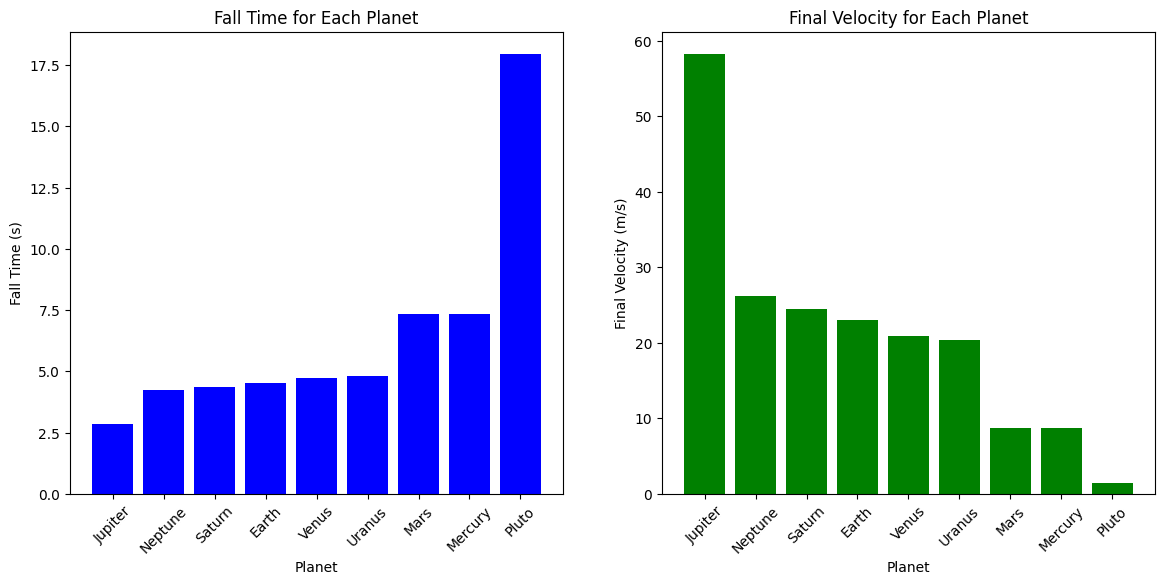

In [20]:
planets = [coin['planet'] for coin in coins_sorted]
fall_times = [coin['true_fall_time'] for coin in coins_sorted]
final_velocities = [coin['v'] for coin in coins_sorted]

# Create graphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot Fall Time
ax1.bar(planets, fall_times, color='blue')
ax1.set_title('Fall Time for Each Planet')
ax1.set_xlabel('Planet')
ax1.set_ylabel('Fall Time (s)')
ax1.tick_params(axis='x', rotation=45)

# Plot Final Velocity
ax2.bar(planets, final_velocities, color='green')
ax2.set_title('Final Velocity for Each Planet')
ax2.set_xlabel('Planet')
ax2.set_ylabel('Final Velocity (m/s)')
ax2.tick_params(axis='x', rotation=45)



# **Fall Times and Final Velocities Across Planets**

## **Key Insights**

### **1. Fall Times:**
- **Shortest:** Jupiter (2.84s, gravity: 24.79 m/s²).
- **Longest:** Pluto (17.96s, gravity: 0.62 m/s²).
- **Trend:** Higher gravity → Shorter fall time.

### **2. Final Velocities:**
- **Highest:** Jupiter (70.4 m/s).
- **Lowest:** Pluto (11.1 m/s).
- **Trend:** Stronger gravity → Higher velocity at impact.

## **Key Graphs**
- **Fall Time Graph:** Inverse relationship with gravity.
- **Velocity Graph:** Direct relationship with gravity.

## **Major Takeaways**
- Larger planets (e.g., Jupiter) → **Shorter fall times** and **higher final velocities.**
- Smaller planets (e.g., Pluto) → **Longer fall times** and **lower final velocities.**
- **Gravity** plays a crucial role in determining free-fall behavior.
---

## Conclusion  
## Summary of Findings
### This study successfully demonstrated the variations in free-fall behavior across different planets using a simulated common object such as 20-peso coin. Key findings include:
### - Planets with higher gravitational acceleration (e.g., Jupiter) exhibit shorter fall times and higher final velocities.
### - Planets with lower gravitational acceleration (e.g., Pluto) have significantly longer fall times and reduced velocities.

## Achievement of Objectives
## The project met its objectives by:
### - Simulating the free fall of a coin on nine different planets.
### - Computing fall times and final velocities using the equations of motion.
### - Visualizing and analyzing the results through graphs and tables.

## Unexpected Results
### Relatively similar fall times and final velocities for planets like Mercury and Mars, despite their differences in size and mass. This can be attributed to the similarity in their gravitational accelerations. Additionally, while Pluto's results were consistent with expectations, the significant difference in fall time highlights how gravity at the edge of our Solar System can drastically affect motion compared to planets like Jupiter.

### Future Work  
- Incorporate atmospheric effects for planets with significant atmospheres.  
- Include rotational forces in calculations.  
- Extend simulations to moons or exoplanets.

